In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import argparse

In [2]:
df = pd.read_csv("D:\Downloads\Video_games_esrb_rating.csv",sep=",", low_memory=False)  #завантажит дані
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [3]:
df=df.drop([ 'title'], axis = 1)
df=df.drop(['fantasy_violence','alcohol_reference','cartoon_violence','console','animated_blood', 'mild_lyrics', 'mild_language', 'strong_sexual_content', 'nudity', 'use_of_drugs_and_alcohol', 'partial_nudity', 'mild_violence', 'mature_humor', 'use_of_alcohol', 'drug_reference', 'strong_janguage', 'lyrics'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   blood                   1895 non-null   int64 
 1   blood_and_gore          1895 non-null   int64 
 2   crude_humor             1895 non-null   int64 
 3   intense_violence        1895 non-null   int64 
 4   language                1895 non-null   int64 
 5   mild_blood              1895 non-null   int64 
 6   mild_cartoon_violence   1895 non-null   int64 
 7   mild_fantasy_violence   1895 non-null   int64 
 8   mild_suggestive_themes  1895 non-null   int64 
 9   no_descriptors          1895 non-null   int64 
 10  sexual_content          1895 non-null   int64 
 11  sexual_themes           1895 non-null   int64 
 12  simulated_gambling      1895 non-null   int64 
 13  suggestive_themes       1895 non-null   int64 
 14  violence                1895 non-null   int64 
 15  esrb

In [4]:
s = df['esrb_rating']
s, unique = pd.factorize(s)  #кожний клас отримаэ инт мітку
df['esrb_rating'] = s  
df['esrb_rating'].value_counts()

3    689
0    416
1    403
2    387
Name: esrb_rating, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   blood                   1895 non-null   int64
 1   blood_and_gore          1895 non-null   int64
 2   crude_humor             1895 non-null   int64
 3   intense_violence        1895 non-null   int64
 4   language                1895 non-null   int64
 5   mild_blood              1895 non-null   int64
 6   mild_cartoon_violence   1895 non-null   int64
 7   mild_fantasy_violence   1895 non-null   int64
 8   mild_suggestive_themes  1895 non-null   int64
 9   no_descriptors          1895 non-null   int64
 10  sexual_content          1895 non-null   int64
 11  sexual_themes           1895 non-null   int64
 12  simulated_gambling      1895 non-null   int64
 13  suggestive_themes       1895 non-null   int64
 14  violence                1895 non-null   int64
 15  esrb_rating          

In [6]:
#мин макс не нужен, все значение либо 1 либо 0 
continuousColumns = ["blood", "blood_and_gore", "crude_humor", "intense_violence", "language", "mild_blood", "mild_cartoon_violence", "mild_fantasy_violence", "mild_suggestive_themes", "no_descriptors", "sexual_content", "sexual_themes", "simulated_gambling", "suggestive_themes", "violence"]
minMaxScaler = MinMaxScaler() #масштабирует в приделах задан. диапазона 0-1, именно колонки
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df[continuousColumns]),columns=continuousColumns)
df.head()

,blood,blood_and_gore,crude_humor,intense_violence,language,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_suggestive_themes,no_descriptors,sexual_content,sexual_themes,simulated_gambling,suggestive_themes,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3


In [7]:
#trgt = ["esrb_rating"] 
#dfprep = df_encoded.columns.drop(trgt) #викидаємо рейтинг
#train,test = train_test_split(df_encoded,test_size = 0.33)  #розбиваємо датасет на тренувальну/тестову вибірку
#xTrain = train[dfprep]
#yTrain = train[trgt]
#xTest  = test[dfprep]
#yTest = test[trgt]
x = df
y = pd.DataFrame(df['esrb_rating'],columns=['esrb_rating'])
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.33)
yTrain = pd.get_dummies(data=yTrain,columns =['esrb_rating'])
yTest = pd.get_dummies(data=yTest,columns =['esrb_rating'])

In [8]:
model = keras.Sequential([layers.Dense(4, activation="softmax")])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(xTrain, yTrain, epochs=100, batch_size=64, validation_data=(xTest, yTest), verbose = 1)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.7650 - accuracy: 0.4145 - val_loss: 0.7548 - val_accuracy: 0.3866
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.4169 - val_loss: 0.7298 - val_accuracy: 0.3802
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7146 - accuracy: 0.4153 - val_loss: 0.7076 - val_accuracy: 0.3802
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4153 - val_loss: 0.6878 - val_accuracy: 0.3802
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.4137 - val_loss: 0.6701 - val_accuracy: 0.3786
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.4137 - val_loss: 0.6542 - val_accuracy: 0.3786
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.4129 - val_loss: 0.6400 - val_accuracy: 0.3786
Epoch 8/100
2

Epoch 59/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.4697 - val_loss: 0.4611 - val_accuracy: 0.4377
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.4697 - val_loss: 0.4599 - val_accuracy: 0.4377
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.4697 - val_loss: 0.4588 - val_accuracy: 0.4393
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.4697 - val_loss: 0.4577 - val_accuracy: 0.4393
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.4697 - val_loss: 0.4566 - val_accuracy: 0.4393
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.4697 - val_loss: 0.4555 - val_accuracy: 0.4393
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.4697 - val_loss: 0.4544 - val_accuracy: 0.4393
Epoch 

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

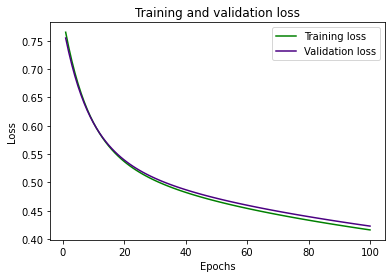

In [10]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.plot(epochs, val_loss_values, "indigo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
score = model.evaluate(xTest, yTest, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.4230402112007141
Test accuracy: 0.5766773223876953


In [12]:
model_nn = keras.Sequential([keras.layers.Dense(16,activation = 'Softmax'), #кол-во стобциов+1  https://qastack.ru/stats/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
                            keras.layers.Dense(20,activation = 'Softmax'), #случайное число
                            keras.layers.Dense(4,activation = 'Softmax'),#выход - кол-во классов
                            ])

es = EarlyStopping(patience=3,restore_best_weights= True)  #Callback пример
model_nn.compile(loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 100, callbacks = es)




Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.5593 - accuracy: 0.2742 - val_loss: 0.5592 - val_accuracy: 0.3482
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.3712 - val_loss: 0.5570 - val_accuracy: 0.3482
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.3712 - val_loss: 0.5555 - val_accuracy: 0.3482
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.3712 - val_loss: 0.5541 - val_accuracy: 0.3482
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.3712 - val_loss: 0.5530 - val_accuracy: 0.3482
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.3712 - val_loss: 0.5518 - val_accuracy: 0.3482
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.3712 - val_loss: 0.5505 - val_accuracy: 0.3482
Epoch 8/100
4

Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9535 - val_loss: 0.2324 - val_accuracy: 0.9345
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9519 - val_loss: 0.2270 - val_accuracy: 0.9457
Epoch 61/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9614 - val_loss: 0.2219 - val_accuracy: 0.9521
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9638 - val_loss: 0.2165 - val_accuracy: 0.9665
Epoch 63/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9764 - val_loss: 0.2111 - val_accuracy: 0.9681
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9787 - val_loss: 0.2059 - val_accuracy: 0.9681
Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9811 - val_loss: 0.2009 - val_accuracy: 0.9712
Epoch 

In [13]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)
print("test_accuracy:",test_acc)
score = model.evaluate(xTest, yTest, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

20/20 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9792
test_accuracy: 0.9792332053184509
Test score: 0.4230402112007141
Test accuracy: 0.5766773223876953


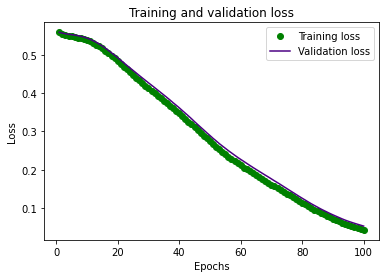

In [14]:
history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.plot(epochs, val_loss_values, "indigo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
model_nn = keras.Sequential([keras.layers.Dense(16,activation = 'Softmax'), #кол-во стобциов+1  https://qastack.ru/stats/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
                            keras.layers.Dense(10,activation = 'Softmax'), #среднее арифм между входом и выходом
                            keras.layers.Dense(4,activation = 'Softmax'),  #как в статье
                            ])

model_nn.compile(loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 100)



Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.5675 - accuracy: 0.2151 - val_loss: 0.5647 - val_accuracy: 0.2077
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.2151 - val_loss: 0.5602 - val_accuracy: 0.2077
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.3491 - val_loss: 0.5567 - val_accuracy: 0.3482
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.3712 - val_loss: 0.5540 - val_accuracy: 0.3482
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.3712 - val_loss: 0.5515 - val_accuracy: 0.3482
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.3712 - val_loss: 0.5492 - val_accuracy: 0.3482
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.3712 - val_loss: 0.5469 - val_accuracy: 0.3482
Epoch 8/100
4

Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9819 - val_loss: 0.1924 - val_accuracy: 0.9712
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9819 - val_loss: 0.1877 - val_accuracy: 0.9712
Epoch 61/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9819 - val_loss: 0.1830 - val_accuracy: 0.9712
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9835 - val_loss: 0.1783 - val_accuracy: 0.9760
Epoch 63/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9866 - val_loss: 0.1738 - val_accuracy: 0.9776
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9898 - val_loss: 0.1692 - val_accuracy: 0.9776
Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9905 - val_loss: 0.1645 - val_accuracy: 0.9776
Epoch 

In [16]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)  #лучше показатель у 20 нейронв в хидден лейер
print("test_accuracy:",test_acc)    
score = model.evaluate(xTest, yTest, verbose=0)  #значения не поменялись, даже со смненой кол-ва нейронов
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

20/20 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 0.9872
test_accuracy: 0.9872204661369324
Test score: 0.4230402112007141
Test accuracy: 0.5766773223876953


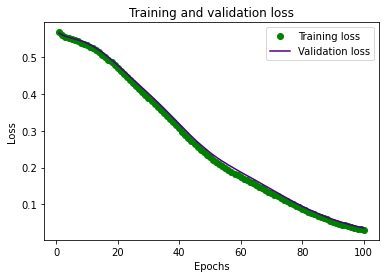

In [17]:
history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "indigo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
model_nn = keras.Sequential([keras.layers.Dense(16,activation = 'Softmax'), #кол-во стобциов+1 
                            keras.layers.Dense(10,activation = 'Softmax'),
                            keras.layers.Dense(7,activation = 'Softmax'),
                            keras.layers.Dense(4,activation = 'Softmax')
                            ])

model_nn.compile(loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 100)


Epoch 1/100
40/40 [==============================] - 1s 5ms/step - loss: 0.5619 - accuracy: 0.2372 - val_loss: 0.5599 - val_accuracy: 0.3482
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.3712 - val_loss: 0.5573 - val_accuracy: 0.3482
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.3712 - val_loss: 0.5555 - val_accuracy: 0.3482
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.3712 - val_loss: 0.5546 - val_accuracy: 0.3482
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.3712 - val_loss: 0.5541 - val_accuracy: 0.3482
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.3712 - val_loss: 0.5537 - val_accuracy: 0.3482
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.3712 - val_loss: 0.5532 - val_accuracy: 0.3482
Epoch 8/100
4

40/40 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.5973 - val_loss: 0.3339 - val_accuracy: 0.5639
Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.6020 - val_loss: 0.3290 - val_accuracy: 0.5751
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.6091 - val_loss: 0.3237 - val_accuracy: 0.5799
Epoch 61/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.6147 - val_loss: 0.3184 - val_accuracy: 0.5927
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.6233 - val_loss: 0.3127 - val_accuracy: 0.6166
Epoch 63/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.6438 - val_loss: 0.3072 - val_accuracy: 0.6342
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.6635 - val_loss: 0.3017 - val_accuracy: 0.6837
Epoch 65/100
40/40 

In [19]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)  # 4й слой не улучшил ситуацию
print("test_accuracy:",test_acc)    
score = model.evaluate(xTest, yTest, verbose=0)  
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9776
test_accuracy: 0.9776358008384705
Test score: 0.4230402112007141
Test accuracy: 0.5766773223876953


In [20]:
model_nn = keras.Sequential([keras.layers.Dense(16,activation = 'Softmax'), #кол-во стобциов+1 
                            keras.layers.Dense(10,activation = 'Softmax'),
                            keras.layers.Dense(7,activation = 'Softmax'),
                            keras.layers.Dense(4,activation = 'Softmax')
                            ])
es = EarlyStopping(patience=3,restore_best_weights= True) 
model_nn.compile(loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 100, callbacks = es)

Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.5560 - accuracy: 0.3712 - val_loss: 0.5570 - val_accuracy: 0.3482
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.3712 - val_loss: 0.5558 - val_accuracy: 0.3482
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.3712 - val_loss: 0.5549 - val_accuracy: 0.3482
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.3712 - val_loss: 0.5546 - val_accuracy: 0.3482
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.3712 - val_loss: 0.5543 - val_accuracy: 0.3482
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.3712 - val_loss: 0.5538 - val_accuracy: 0.3482
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.3712 - val_loss: 0.5533 - val_accuracy: 0.3482
Epoch 8/100
4

Epoch 59/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.5957 - val_loss: 0.3544 - val_accuracy: 0.5575
Epoch 60/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.5957 - val_loss: 0.3539 - val_accuracy: 0.5575
Epoch 61/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.5957 - val_loss: 0.3533 - val_accuracy: 0.5575
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.5957 - val_loss: 0.3527 - val_accuracy: 0.5575
Epoch 63/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.5957 - val_loss: 0.3524 - val_accuracy: 0.5575
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.5957 - val_loss: 0.3518 - val_accuracy: 0.5575
Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.5957 - val_loss: 0.3513 - val_accuracy: 0.5575
Epoch 

In [21]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)  # колбєк не улучшил accurancy
print("test_accuracy:",test_acc)    
score = model.evaluate(xTest, yTest, verbose=0)  
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

20/20 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8051
test_accuracy: 0.805111825466156
Test score: 0.4230402112007141
Test accuracy: 0.5766773223876953
